In [ ]:
# This is the plot file for configuration animation
#  file: 2d_ising_visual.ipynb
# 
#  Program takes the output data to animate to get an visualization of configuration change over time
#
#  Programmers:  Youwei Liu            liu.9639@osu.edu
#
#  Revision history:
#     30-Apr-2023  original version 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Read the data from the file
with open('Disorder_with_C=0.005_test.dat', 'r') as f:
    data = f.read()

# Split the data into individual spin configurations

configs = data.strip().split('\n\n')[1:]
frame_rows = [frame.split('\n') for frame in configs]

spin_config=np.zeros((len(configs),len(frame_rows[0]),len(frame_rows[0])))
for i in range(len(frame_rows)):
    frame_rows[i] = [rows.split(' ') for rows in frame_rows[i]]
    for j in range(len(frame_rows[i])):
        spin_config[i][j]=np.array([int(element) for element in frame_rows[i][j] if element!=''])

# Define the colors for each spin value
colors = {-1: 'blue', 0: 'black', 1: 'yellow'}


The above code take the data from the .dat file and read the file into the 3-dimensional matrix spin_config, spin_config[i] indicate the frame(at any given flip number, what's the configuration), spin_config[i][j][k], j k indicate the row and cols respectively

The below code take the matrix data and plot in into an animation,(this is time consuming, so I do not plot all of the plot)

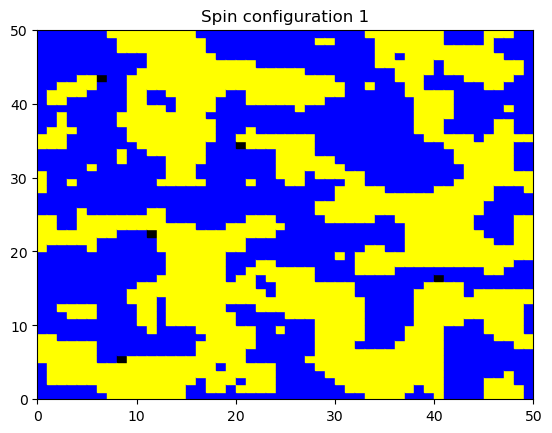

In [4]:
# Define a function to update the plot for each frame of the animation
def update(frame):
    # Clear the previous plot
    plt.clf()
    # Set the title
    plt.title('Spin configuration {}'.format(frame+1))
    # Get the spin configuration for the current frame
    spin_frame = spin_config[frame]
    # Create a grid of colored squares based on the spin values
    squares = [[plt.Rectangle((i, j), 1, 1, color=colors[spin_frame[i][j]]) for j in range(spin_frame.shape[1])] for i in range(spin_frame.shape[0])]
    # Add the squares to the plot
    for row in squares:
        for square in row:
            plt.gca().add_patch(square)
    # Set the limits of the plot
    plt.xlim(0, spin_frame.shape[0])
    plt.ylim(0, spin_frame.shape[1])

# Create the animation object
ani = animation.FuncAnimation(plt.gcf(), update, frames=len(configs), interval=500)

# Save the animation as an mp4 file
ani.save('Disorder_with_C=0.005_1.mp4')

# Display the animation in the Jupyter notebook
HTML(ani.to_html5_video())

# Save the animation as an HTML5 video file
with open('animation.html', 'w') as f:
    f.write(ani.to_html5_video())
